# Auto Analysis Notebook

This Jupyter Notebook is designed for automated analysis of CSV data files. It includes the following functionalities:

1. **Data Import and Configuration**:
   - Imports necessary libraries like `pandas` and `re`.
   - Configures pandas display options for better readability.

2. **File Processing**:
   - Utilizes the `CSVProcessor` class to process input CSV files and save the results to an output file.

3. **Data Exploration**:
   - Prints column names of the processed DataFrame.
   - Provides counts of specific references and mentions in the data.

4. **Detailed Row Analysis**:
   - Outputs detailed information for specific rows, including content, comments, and references.

This notebook is structured to streamline the analysis of structured data, making it easier to extract insights and generate reports.

In [30]:
import pandas as pd
import re
import spacy
from spacy import displacy  


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [31]:
# data_path = "data\\input_SP60.csv"
data_path = "data\\input_SP477.csv"

In [32]:
from auto_semantic.df_vizualizer import DataframeVisualizer
from auto_semantic.csv_processor import CSVProcessor  # Импортируем класс из другого файла

input_file = data_path
output_file = "auto_semantic//01_processed_data.csv"

# Создаем экземпляр класса
processor = CSVProcessor(input_file, output_file, pattern_json_path="auto_semantic\\patterns.json")

# Запускаем обработку данных
processor.process_data()

print("Файл успешно обработан и сохранен в", output_file)


Файл успешно обработан и сохранен в auto_semantic//01_processed_data.csv


In [33]:
row_start = 1
row_len = 5

for row in range(row_start, row_start+row_len):
    print(f"Содержание - {processor.df["Содержание"][row]}")
    print(f"Комментарии - {processor.df["Комментарии"][row]}")
    print(f"Наличие ссылок на другие НД, в которых содержатся требования - {processor.df["Наличие ссылок на другие НД, в которых содержатся требования"][row]}")
    print(f"Наличие ссылок на Задание на проектирование - {processor.df["Наличие ссылок на Задание на проектирование"][row]}")
    print(f"Наличие ссылок на другие пункы этого СП - {processor.df["Наличие ссылок на другие пункы этого СП"][row]}")
    print("\n")

Содержание - <p>5.2 Наибольшая площадь надземного этажа в пределах пожарного отсека в зависимости от класса функциональной пожарной опасности помещений (кроме стилобатной части) должна быть:</p><p>- до 1500 м<span class="ql-formula" data-value="^2">?<span contenteditable="false"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mrow></mrow><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class=""></span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span class="" style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span><

--- Basic Column Statistics ---
Total rows: 67
Обрабатывается в ЦИМ: 0 flagged
Подлежит переводу в МПФ: 0 flagged
Передано подрядчику: 0 flagged
Наличие ссылок на другие НД, в которых содержатся требования: 35 flagged
Наличие ссылок на Задание на проектирование: 6 flagged
Наличие ссылок на другие пункы этого СП: 0 flagged
Наличие формул: 0 flagged
Упоминание расчетов: 4 flagged
Наличие таблиц: 2 flagged
Наличие рисунков/диаграмм: 0 flagged
Требование носит рекомендательный характер: 22 flagged
Rows with no comments: 25


c:\Users\donchenko\Documents\mid_repos\notes_code\01_FAUFCC\auto_semantic\df_vizualizer.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(count_data.keys()), y=list(count_data.values()), palette="viridis")


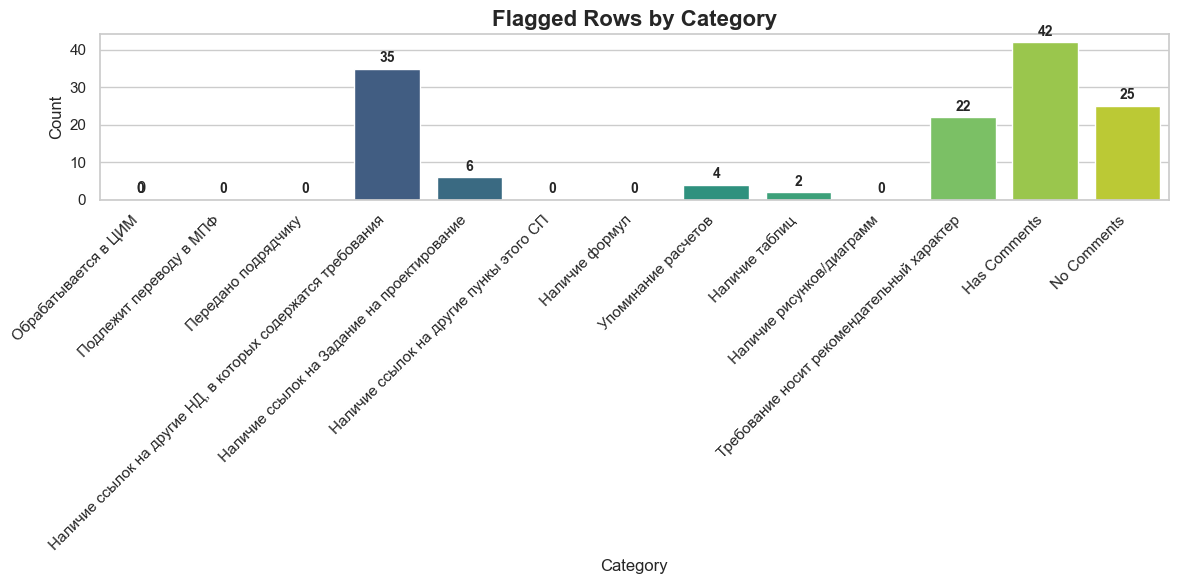

In [34]:
viz = DataframeVisualizer(processor.df)
viz.show_summary()

## 2. Требования, прошедшие фильтр, анализируются средствами NLP  

- возможна / требуется дообучение модели для задач

In [35]:
from auto_semantic.sentence_processor import SentenceProcessor

In [36]:
df_semantic = processor.df.loc[processor.df["Комментарии"] == ""].copy()

In [37]:
processor = SentenceProcessor(model="auto_semantic\\nlp_learning\\custom_ner_model_ru")


In [38]:
def clean_html_tags(text: str) -> str:
    """Remove HTML tags from the given text string."""
    if not isinstance(text, str):
        return text
    return re.sub(r'<[^>]+>', '', text).strip()

In [39]:
number_row = 1

sentence = clean_html_tags(df_semantic["Содержание"].iloc[number_row])

In [40]:
processor.load_text(sentence)

In [41]:
processor.get_entities()

[{'sentence': '5.11 В пределах высотного здания, комплекса размещать взрывоопасные помещения категорий А и Б не допускается.',
  'index': 1,
  'entities': [('пределах', 'COMPONENT'),
   ('высотного здания', 'LOCATION'),
   ('комплекса размещать', 'ACTION'),
   ('категорий', 'PARAMETER'),
   ('А', 'PARAMETER')]}]

In [42]:

processor.render_entities()

In [43]:
processor.render_subject_modifier_relations()